In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import birdsonganalysis as bsa
from os.path import join, exists
from scipy.io import wavfile
import pickle
import json
from pprint import pprint


import sys

sys.path.append('../model/hillclimbing/')

from song_fitter import SongModel, get_scores

sns.set_palette('colorblind')

In [193]:
path = '../model/hillclimbing/res/170309_170308_mid_run_bells/'
if exists(join(path, 'aborted.txt')):
    raise ValueError('Aborted run')

In [194]:
sr, tutor = wavfile.read(join(path, 'tutor.wav'))
with open(join(path, 'params.json'), 'r') as f:
    run_param = json.load(f)

In [195]:
pprint(run_param)

{'commit': '3ff40df0604564eda762711d8633118322eba7ad',
 'concurrent': 3,
 'days': 10,
 'iter_per_train': 20,
 'name': 'mid_run_bells',
 'replay': 10,
 'seed': 1489075388,
 'train_per_day': 50}


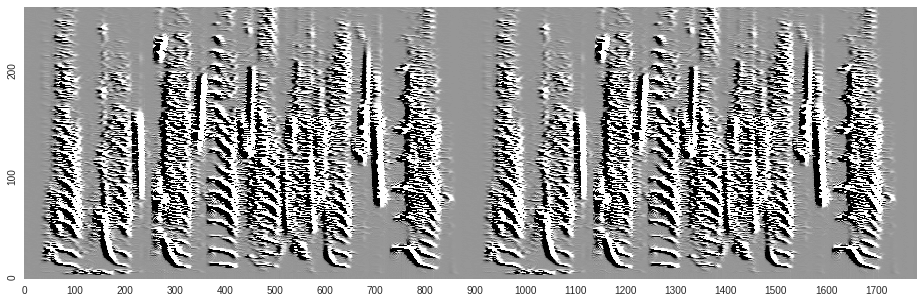

In [199]:
tspec = bsa.spectral_derivs(tutor, 256, 40, 1024)
fig = plt.figure(figsize=(16, 5))
ax = fig.gca()
ax = bsa.spectral_derivs_plot(tspec, contrast=0.01, ax=ax)
plt.show(fig)
plt.close(fig)

In [200]:
outputs = []
for i in range(run_param['concurrent']):
    outputs.append(wavfile.read(join(path, 'out_{}.wav'.format(i)))[1])

In [208]:
from IPython.display import Audio, display

In [210]:
display(Audio(tutor, rate=44100))

In [209]:
for output in outputs:
    display(Audio(output, rate=44100))

In [103]:
for out in outputs:
    sim = bsa.similarity(out, tutor)
    bsa.similarity_plot(sim, out, tutor)
    print(sim['similarity'])

KeyboardInterrupt: 

In [150]:
out = outputs[0]

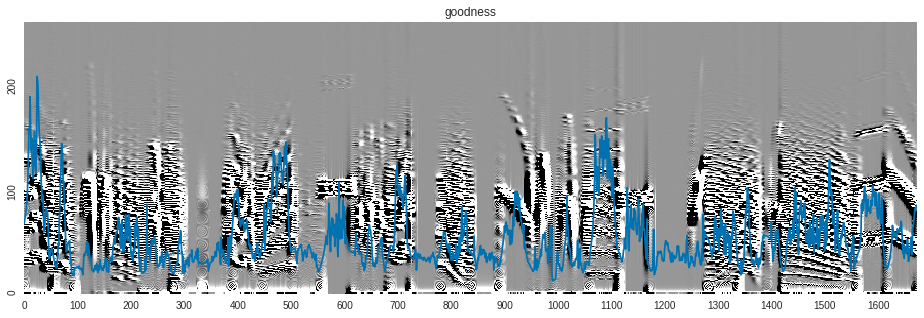

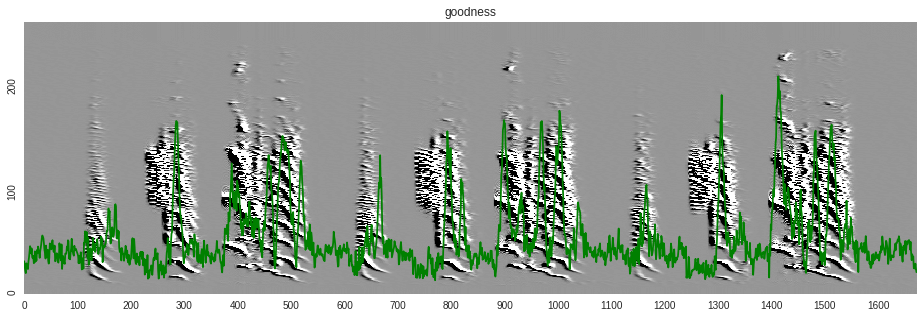

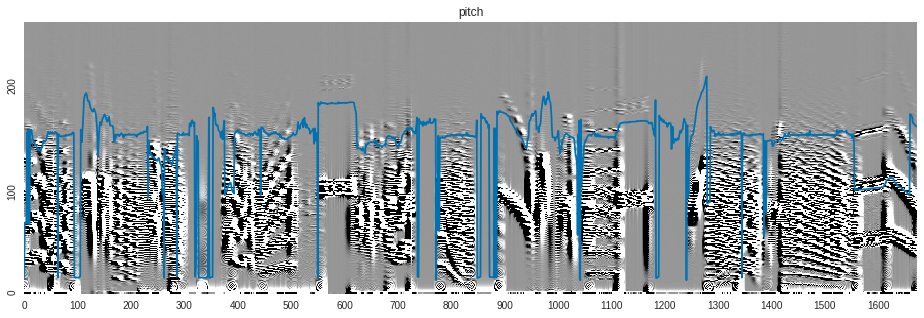

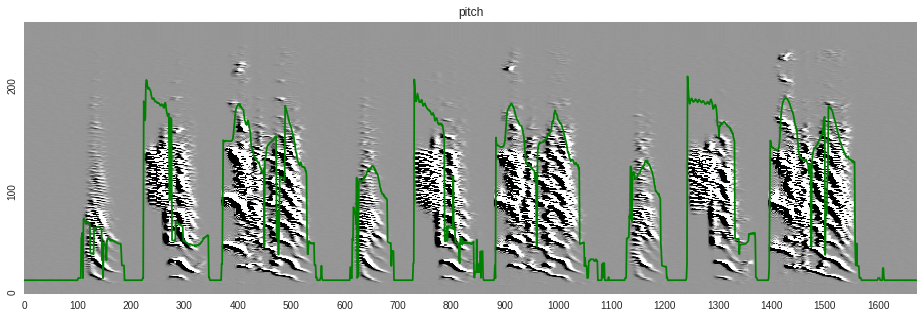

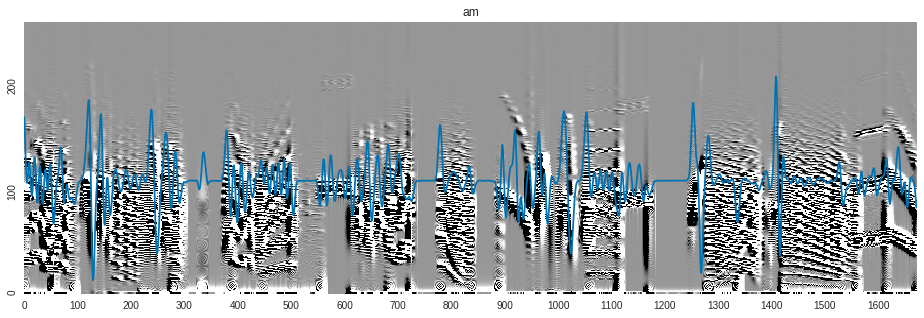

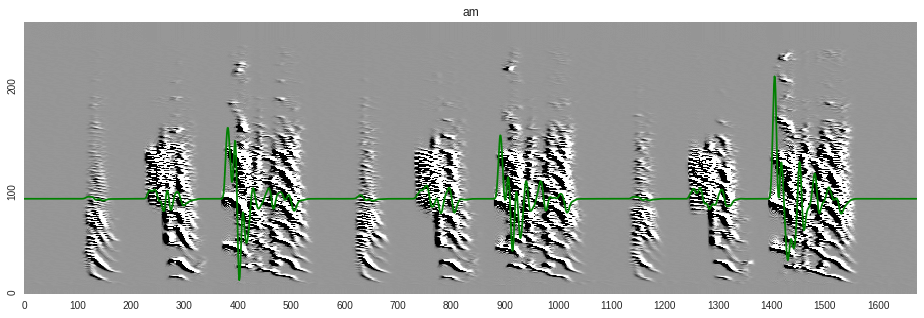

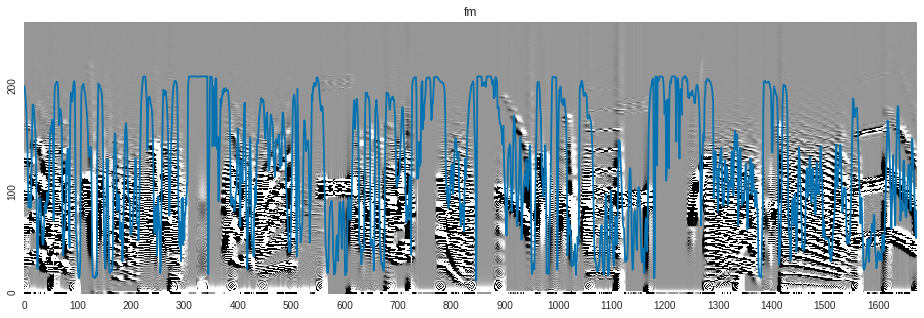

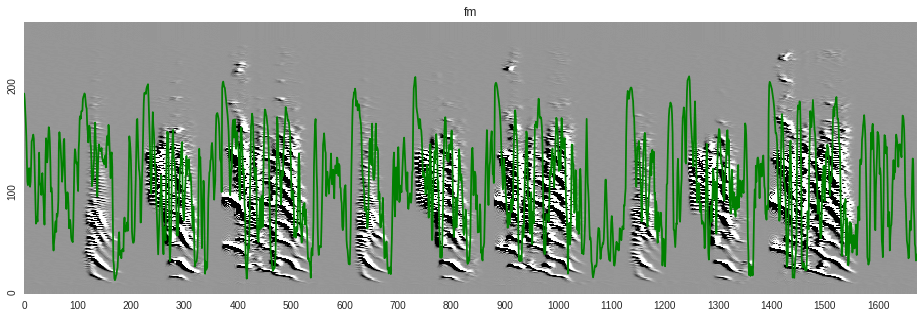

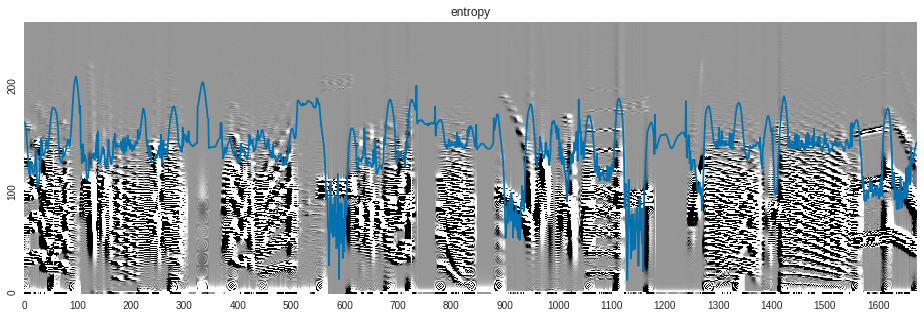

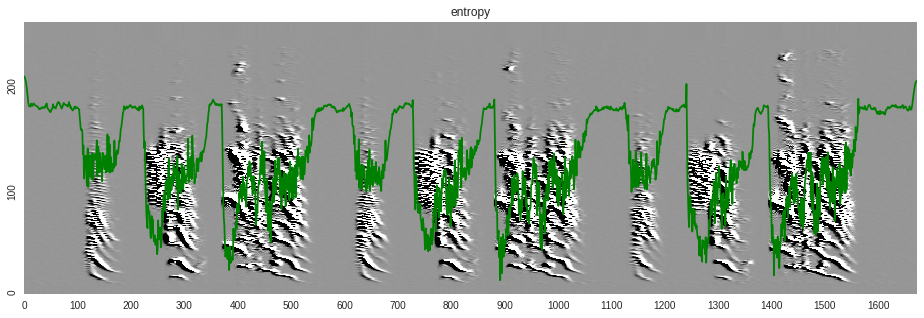

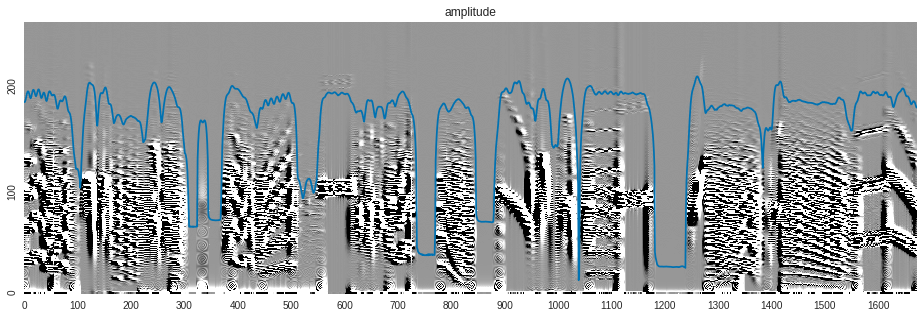

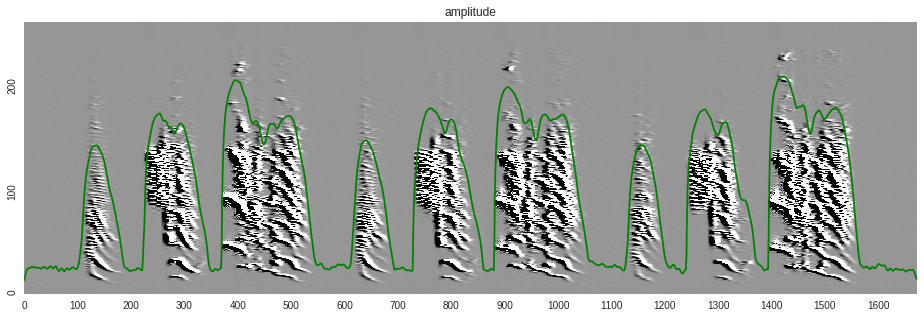

In [151]:
tfeat = bsa.all_song_features(tutor, 256, 40, 1024)
spec = bsa.spectral_derivs(out, 256, 40, 1024)
for name, value in bsa.all_song_features(out, 256, 40, 1024).items():
    fig = plt.figure(figsize=(16, 5))
    ax = fig.gca()
    ax = bsa.spectral_derivs_plot(spec, contrast=0.01, ax=ax)
    bsa.plot_over_spec(value, ax)
    #ax.plot(tfeat[name])
    ax.set_title(name)
    fig = plt.figure(figsize=(16, 5))
    ax = fig.gca()
    ax = bsa.spectral_derivs_plot(tspec, contrast=0.01, ax=ax)
    bsa.plot_over_spec(tfeat[name], ax, color='g')
    #ax.plot(tfeat[name])
    ax.set_title(name)
    

In [211]:
with open(join(path, 'songs.pkl'), 'rb') as f:
    smodels = pickle.load(f)

In [212]:
len(smodels[1].gestures)

34

In [213]:
import synth

In [214]:
ab = []
for i, gesture in enumerate(smodels[0].gestures):
    p = gesture[1]
    start = gesture[0]
    try:
        end = smodels[0].gestures[i+1][0]
    except IndexError:
        end = len(tutor)
    size = end - start
    ab.append(synth.gen_alphabeta(p, size, falpha=lambda x, p: synth.only_sin(x, p, nb_sin=3),
                fbeta=lambda x, p: synth.only_sin(x, p, nb_sin=1),
                falpha_nb_args=13))
ab = np.concatenate(ab)

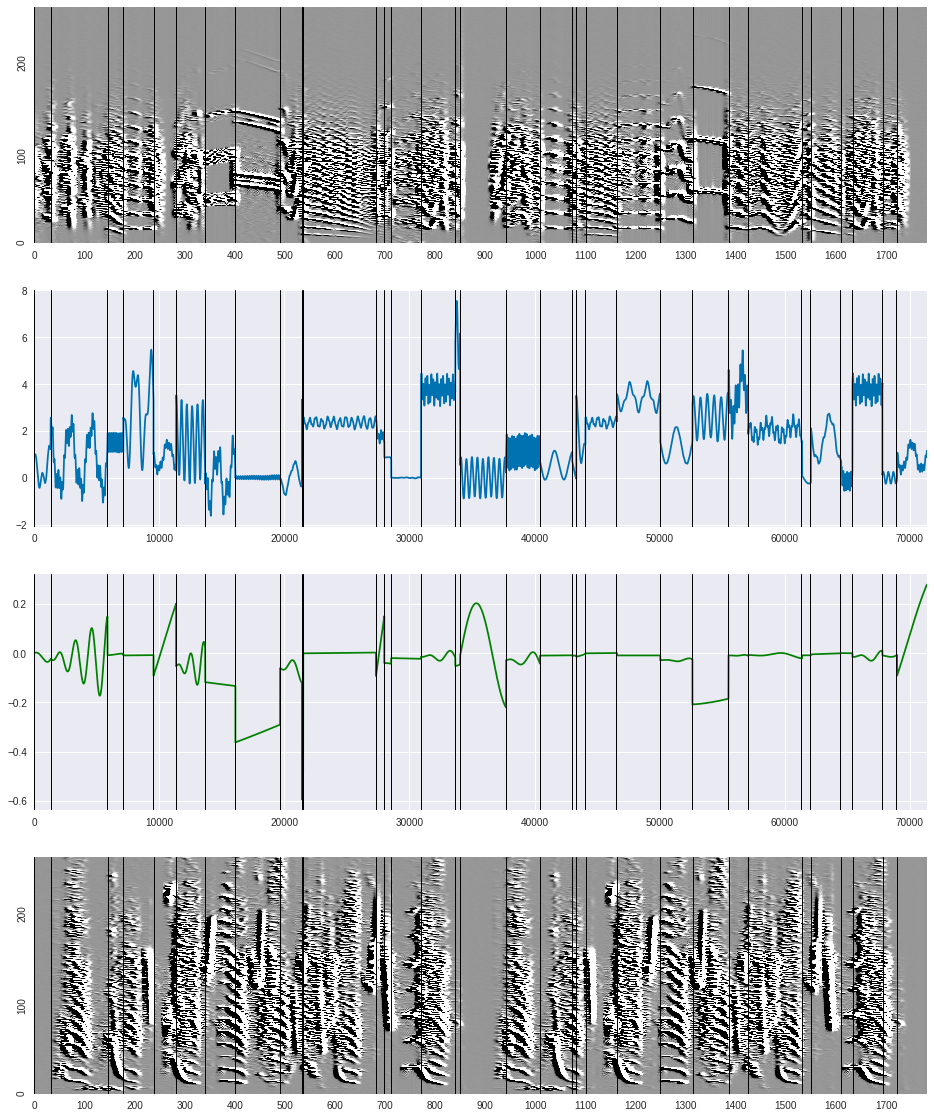

In [215]:
fig, axs = plt.subplots(4, 1, figsize=(16, 20))
ospec = bsa.spectral_derivs(outputs[0], 256, 40, 1024)
bsa.spectral_derivs_plot(ospec, contrast=0.01, ax=axs[0])
axs[0].set_xlim(0, ospec.shape[0])
axs[1].plot(ab[:, 0])
axs[1].set_xlim((0, ab.shape[0]))
axs[2].plot(ab[:, 1], color="g")
axs[2].set_xlim((0, ab.shape[0]))
bsa.spectral_derivs_plot(tspec, contrast=0.01, ax=axs[3])
for i, gesture in enumerate(smodels[0].gestures):
    start = gesture[0]
    axs[0].axvline(x=start/40, color="k", linewidth=1)
    axs[1].axvline(x=start, color="k", linewidth=1)
    axs[2].axvline(x=start, color="k", linewidth=1)
    axs[3].axvline(x=start/40, color="k", linewidth=1)

In [216]:
tutor_params = np.loadtxt('../data/ba_example_ab.dat')

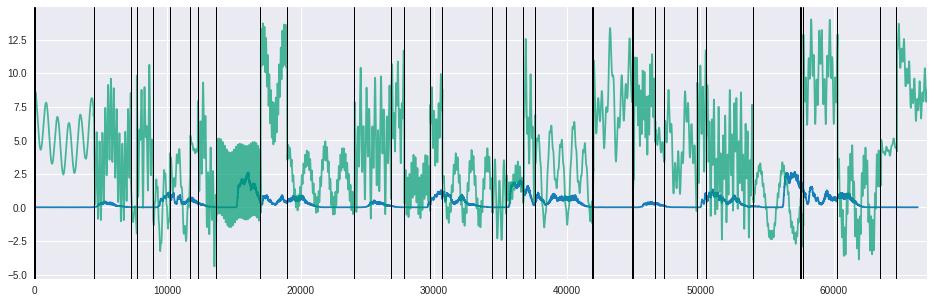

In [170]:
plt.figure(figsize=(16, 5))
plt.plot(tutor_params[:, 0], alpha=0.9)
plt.plot(ab[:, 0], alpha=0.7)
plt.xlim(0, ab.shape[0])
for i, gesture in enumerate(smodels[0].gestures):
    start = gesture[0]
    plt.axvline(x=start, color="k", linewidth=1)

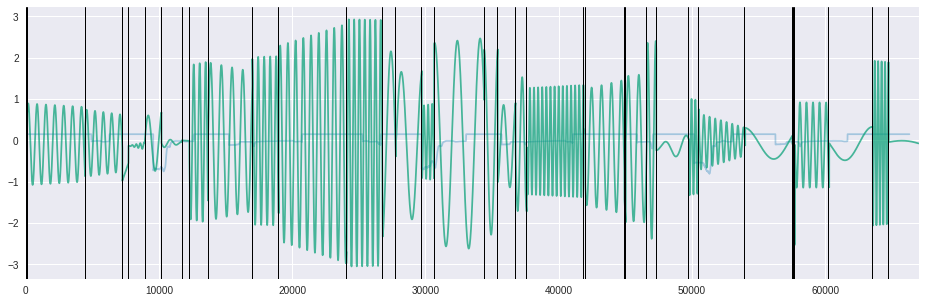

In [171]:
plt.figure(figsize=(16, 5))
plt.plot(tutor_params[:, 1], alpha=0.3)
plt.plot(ab[:, 1], alpha=0.7)
plt.xlim(0, ab.shape[0])
for i, gesture in enumerate(smodels[0].gestures):
    start = gesture[0]
    plt.axvline(x=start, color="k", linewidth=1)

In [127]:
gtes = np.loadtxt('../data/ba_example_gte.dat')
true_gtes = gtes[np.concatenate(((np.diff(gtes) > 100), (False,)))]

In [128]:
plt.figure(figsize=(16, 5))
plt.plot(tutor_params[:, 0])
plt.plot(ab[:, 0], alpha=0.5)
plt.xlim(0, ab.shape[0])
for gte in true_gtes:
    start = gesture[0]
    plt.axvline(x=gte, color="k", linewidth=1)

NameError: name 'tutor_params' is not defined

In [177]:
len(true_gtes)

65

In [178]:
np.mean(np.diff(true_gtes))

881.453125

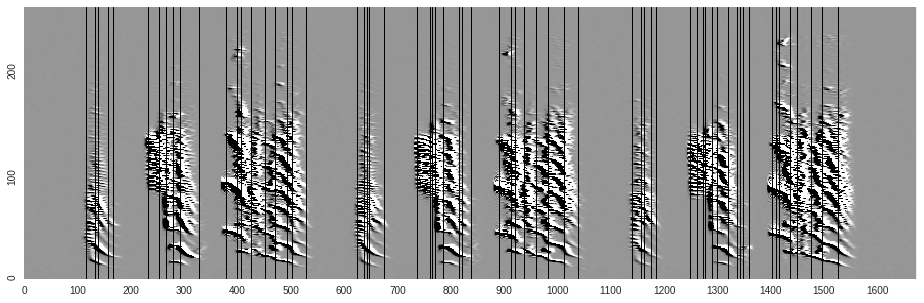

In [179]:
fig = plt.figure(figsize=(16, 5))
ax = fig.gca()
ax = bsa.spectral_derivs_plot(tspec, contrast=0.01, ax=ax)
ax.set_xlim(0, ab.shape[0]/40)
for gte in true_gtes:
    ax.axvline(x=gte/40, color="k", linewidth=1)

# Analysis of the song log

In [217]:
with open(join(path, 'data.pkl'), 'rb') as f:
    songlog = pickle.load(f)

In [218]:
root_data = [elem[1] for elem in songlog if elem[0] == 'root']

In [219]:
root_data

[{'moment': 'Start',
  'scores': array([ 12058.36689986,  12058.36689986,  12058.36689986]),
  'songs': [<song_model.SongModel at 0x7f15eb697e10>,
   <song_model.SongModel at 0x7f16060aa198>]},
 {'moment': 'BeforeNight',
  'scores': array([ 10670.26117708,   9681.48733686,   8514.42994206]),
  'songs': [<song_model.SongModel at 0x7f1612b73b38>,
   <song_model.SongModel at 0x7f1606587eb8>]},
 {'moment': 'AfterNight',
  'scores': array([ 8075.33997238,  8388.46892989,  9145.57190669]),
  'songs': [<song_model.SongModel at 0x7f16128205f8>,
   <song_model.SongModel at 0x7f1606578c50>]},
 {'moment': 'BeforeNight',
  'scores': array([ 6564.69839479,  7693.66483337,  8095.20336428]),
  'songs': [<song_model.SongModel at 0x7f15eb5f5940>,
   <song_model.SongModel at 0x7f15eb607a20>]},
 {'moment': 'AfterNight',
  'scores': array([ 5983.72961574,  5786.10499991,  6073.62301263]),
  'songs': [<song_model.SongModel at 0x7f15eb5c25c0>,
   <song_model.SongModel at 0x7f15eb558400>]},
 {'moment': 'Befo

In [220]:
import pandas

In [221]:
rd = pandas.DataFrame(root_data)

In [222]:
rd['songs'][0]

In [223]:
day_opt = pandas.DataFrame([elem[1] for elem in songlog if elem[0] == 'day_optim'])

In [224]:
day_opt.iloc[50*3:50*4]

ig  isong    new_score    pre_score  \
150  29      1   399.251489   459.110042   
151   3      0   161.318170   161.424145   
152  25      0   162.417404   167.322326   
153  24      1   240.967800   240.967800   
154  15      2  1068.756976  1341.567739   
155  18      0   298.194582   380.200819   
156  16      0   211.893874   398.935523   
157   6      0   172.226687   198.255721   
158  20      1   258.823794   333.452311   
159  19      1    28.882849   279.137590   
160  22      2   297.039854   297.039854   
161  18      2   272.990594   272.990594   
162  26      0   187.586474  2655.856238   
163   1      0    38.769036    38.769036   
164  20      1   254.745087   258.823794   
165   1      1    78.949596   313.241103   
166   0      2  1869.441532  1869.441532   
167   3      0   121.124041   161.318170   
168   9      0   187.581981   187.581981   
169   4      0   652.766267   710.472910   
170  15      2   820.411399  1068.756976   
171   0      1   754.761127   812.549797   
172  17      0    29.276877   162.107582   
173  20      1   241.040501   254.745087   
174   2      2   578.709380   616.676272   
175  26      2   201.834384  2655.856238   
176  31      2  1392.049943  1392.049943   
177  12      2   144.497424   202.400675   
178  24      0   181.095764   317.727804   
179   7      1   255.087083   255.087083   
180  12      1   397.528214   405.566805   
181  11      2   229.204658   439.713188   
182   6      0   147.371859   172.226687   
183  22      2   297.039854   297.039854   
184   9      1   176.900896   187.581981   
185   1      0    38.769036    38.769036   
186  28      1   278.543959   291.442277   
187  31      1   706.385960   706.385960   
188  16      1   283.042773   588.743290   
189  28      1   278.543959   278.543959   
190  16      2   235.145568   388.223499   
191   5      1   158.767706   158.767706   
192   2      1   579.978804  2294.511567   
193  17      2    22.538126   162.107582   
194  20      1   175.888631   241.040501   
195  15      1  1225.962216  1225.962216   
196  25      2   167.322326   167.322326   
197  20      2   304.182570  1810.269621   
198  20      2   304.182570   304.182570   
199  19      2    23.413244   688.420973   

                                                 prior  \
150  [0.0, 0.0, 3.14159265359, 30.0, 0.0, 0.0, 0.78...   
151  [-0.608405528277, 0.969542906796, 3.1415926535...   
152  [-0.359356316812, 0.12684300044, 2.90834055139...   
153  [-0.209412108675, 0.138961486281, 3.1415926535...   
154  [0.380096482729, 0.0, 2.24919299099, 30.142371...   
155  [-0.020587094432, 0.950589548454, 3.1415926535...   
156  [0.00776468893703, 0.0, 2.7192391329, 31.44471...   
157  [-0.020587094432, 0.950589548454, 3.1415926535...   
158  [0.0, 0.0, 3.14159265359, 30.0, 0.0, 0.0, 0.78...   
159  [0.0, 0.0, 3.14159265359, 30.0, 0.0, 0.0, 0.78...   
160  [-0.119092221376, 0.0544193533783, 3.141592653...   
161  [-0.110034473389, 0.372168936142, 3.1415926535...   
162  [0.0, 0.0, 3.14159265359, 30.0, 0.0, 0.0, 0.78...   
163  [-0.298626552778, 0.738059737412, 3.1415926535...   
164  [0.0145428341327, 0.0, 3.14159265359, 30.85689...   
165  [0.0, 0.0, 3.14159265359, 30.0, 0.0, 0.0, 0.78...   
166  [0.00776468893703, 0.0, 2.7192391329, 31.44471...   
167  [-0.819208093912, 0.757337065073, 3.1415926535...   
168  [-0.145451212247, 0.0, 2.59227454553, 37.80164...   
169  [-0.472109562046, 0.0, 3.14159265359, 33.59571...   
170  [0.258930792553, 0.0, 2.47252784382, 32.632987...   
171  [0.491899474521, 0.323858863588, 3.07870273931...   
172  [0.0, 0.0, 3.14159265359, 30.0, 0.0, 0.0, 0.78...   
173  [-0.527376233369, 0.285688591219, 3.1415926535...   
174  [0.0, 0.0, 3.14159265359, 30.0, 0.0, 0.0, 0.78...   
175  [0.0, 0.0, 3.14159265359, 30.0, 0.0, 0.0, 0.78...   
176  [0.213466147698, 0.560262270899, 3.14159265359...   
177  [-0.472109562046, 0.0, 3.14159265359, 33.59571...   
178  [-0.020587094432, 0.950589548454, 3.1415926535...   
179  [0.197268853274

In [225]:
len(np.where(day_opt['pre_score'] - day_opt['new_score'] < 0)[0])/len(day_opt)

0.0

In [226]:
day_opt['pre_score'] - day_opt['new_score']

0      2304.821843
1      2007.231129
2      2505.398251
3      2345.706401
4      2390.609199
5      2345.275885
6         0.000000
7      2459.288553
8      2412.725938
9      1989.957703
10     2420.689466
11     2422.841292
12     2298.897908
13      705.068239
14     2202.774297
15     2046.700648
16     2194.503689
17     2329.336610
18     2262.305699
19     2045.979013
20     1211.552323
21     2253.589274
22      219.635792
23     1892.738735
24     2276.606052
25     2242.335834
26      757.270252
27       28.136151
28     2006.346190
29     2036.883025
          ...     
470      24.211496
471       0.000000
472       0.000000
473    1077.974516
474      81.759654
475       8.711050
476      27.241176
477       0.000000
478       0.000000
479       0.000000
480       0.000000
481      15.803475
482       8.657006
483      42.404576
484       0.000000
485       0.000000
486       0.000000
487     158.298108
488       0.000000
489       2.311064
490       0.000000
491       7.

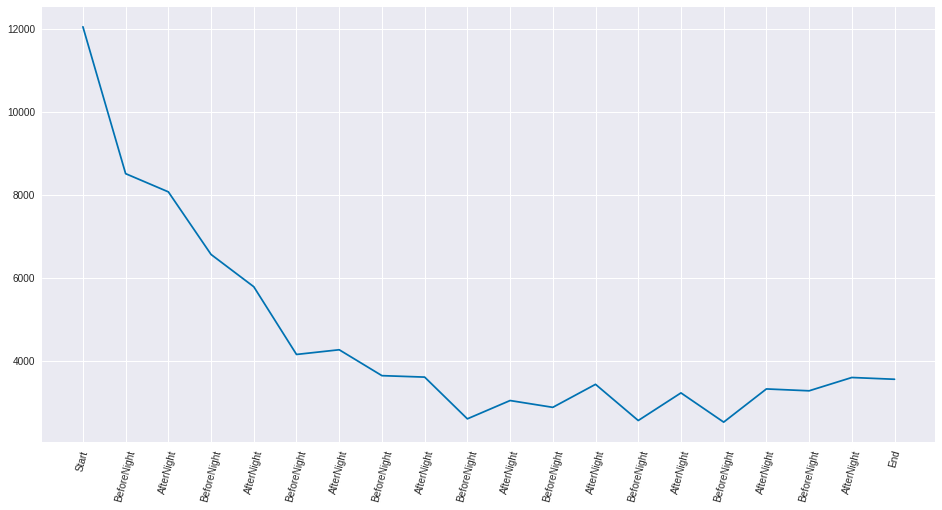

In [229]:
plt.figure(figsize=(16, 8))
plt.plot(rd['scores'].apply(np.min))
plt.xticks(range(len(rd['scores'])), rd['moment'], rotation=75)
plt.show()

In [189]:
rd['songs'][0][0].gestures[23]

[51314, array([  0.00000000e+00,   0.00000000e+00,   3.14159265e+00,
          3.00000000e+01,   0.00000000e+00,   0.00000000e+00,
          7.85398163e-01,   9.00000000e+01,   0.00000000e+00,
          0.00000000e+00,   3.49065850e-01,   2.70000000e+02,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.50000000e-01])]

In [190]:
rd['songs'][4][0].gestures[23]

[51726, array([  0.00000000e+00,   0.00000000e+00,   3.14159265e+00,
          3.00000000e+01,   0.00000000e+00,   0.00000000e+00,
          7.85398163e-01,   9.00000000e+01,   0.00000000e+00,
          0.00000000e+00,   3.49065850e-01,   2.70000000e+02,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.50000000e-01])]

[  0.00000000e+00   0.00000000e+00   3.14159265e+00   3.00000000e+01
   0.00000000e+00   0.00000000e+00   7.85398163e-01   9.00000000e+01
   0.00000000e+00   0.00000000e+00   3.49065850e-01   2.70000000e+02
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   1.50000000e-01] 51726 53545
[[ 0.    0.15]
 [ 0.    0.15]
 [ 0.    0.15]
 ..., 
 [ 0.    0.15]
 [ 0.    0.15]
 [ 0.    0.15]]
[  0.00000000e+00   0.00000000e+00   3.14159265e+00   3.00000000e+01
   0.00000000e+00   0.00000000e+00   7.85398163e-01   9.00000000e+01
   0.00000000e+00   0.00000000e+00   3.49065850e-01   2.70000000e+02
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   1.50000000e-01] 51314 53545
[[ 0.    0.15]
 [ 0.    0.15]
 [ 0.    0.15]
 ..., 
 [ 0.    0.15]
 [ 0.    0.15]
 [ 0.    0.15]]
[ -1.96435854e-01   0.00000000e+00   2.58799885e+00   2.78486585e+01
   2.10828803e-01   5.32832371e-01   6.72214836e-01   7.77937767e+01
   2.78428706e-02 

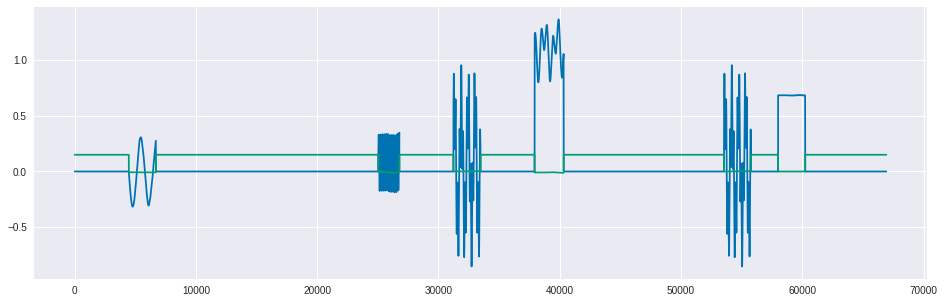

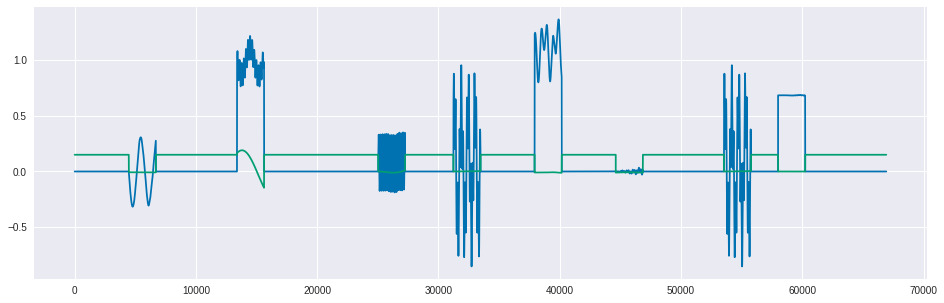

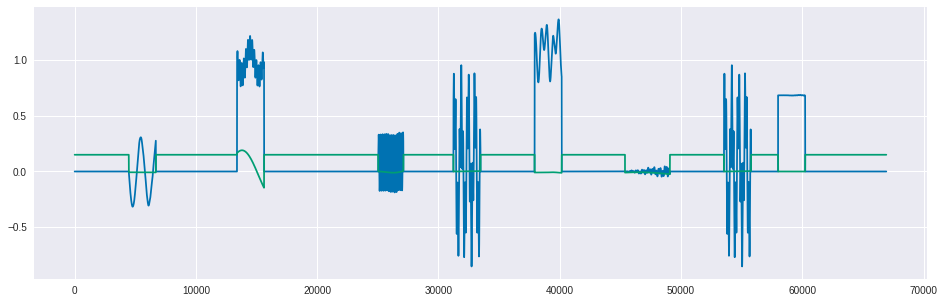

In [191]:
for i in range(3):
    plt.figure(figsize=(16, 5))
    plt.plot(rd['songs'][4][i].gen_alphabeta())

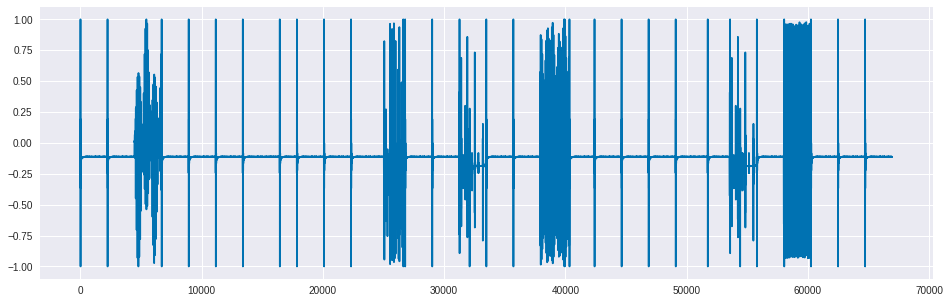

In [192]:
plt.figure(figsize=(16, 5))
plt.plot(rd['songs'][4][0].gen_sound())